In the example document below we show how to load and visualise the Google Trends and WHO Flunet datasets.

Changes to the demonstration in the lecture:

 - each search term result was downloaded seperately from the google trends website
 - period was May 2010 to May 2015 (Google only returns monthly summaries if you try to search for more than 5 years).
 - the full UK Flunet WHO data was downloaded (covers 1995 to present) and we use PANDAs to select the 5 years matching the Google Trends data.
 - the `read_csv` function call has been adapted to have argument `skiprows` that can skip the first lines in the datafile that are not part of the data table
 - we use the pandas `replace` function to change instances of `<1` to `0`
 - to make a fit that produces a formula to predict cases based on search terms we use the `ols` function from the `statsmethod` module.

#### Preparing the workspace and downloading the data

The following search term data was downloaded:

 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_jab
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_symptoms

(As Google scales the results to range 0-100 this means we keep more accuracy when looking for terms that have a relatively low search volume).

Create a working directory `week_7` and store our notebook in this. Add a new subdirectory `data` where we save the output files. These are renames to:

 - `"google_trends_flu.csv"`
 - `"google_trends_flu_jab.csv"`
 - `"google_trends_flu_symptoms.csv"`

To download the WHO Flunet data go to: https://www.who.int/tools/flunet

Then click on link: <a href="http://apps.who.int/flumart/Default.aspx?ReportNo=7">By country, area or territory - optional time period selection</a>

Select `United Kingdom of Great Britain and Northern Ireland` from 1995 week 1 to 2021 week 53, and click `Display report`. 

When the chart appears click the *Save to disk* icon and select *CVS (comma delimited)*. 

Rename the downloaded file and save it into the `data` subdirectory.

`who_flunet.csv`



In [458]:
# import libraries used by the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

In [460]:
data_path

'data/google_trends_original.csv'

We can either organise our data by putting it in our working directory, or if we have a lot of files we can put them in their own directory on our disk.


In [464]:
# generate a string containing the filepath to the file
data_path = os.path.join("data", "google_trends_flu.csv")
# 'data/google_trends_original.csv'

# load in the file.
# skiprows=3 is used to skip the lines that do not contain the data
# names=... is used to rename the columns
flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu'])
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    261 non-null    object
 1   flu     261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [466]:
# convert the date column from object type (storing strings) to datetime type
flu_df.date = pd.to_datetime(flu_df.date)
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    261 non-null    datetime64[ns]
 1   flu     261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [459]:
# sometimes google trends enters writes `<1` to indicate 
# search volume was not zero but was less than 1

# in this case 
flu_df[data_cols] = flu_df[data_cols].replace('<1','0').astype('float64')

flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          261 non-null    datetime64[ns]
 1   flu           261 non-null    float64       
 2   flu_jab       261 non-null    float64       
 3   flu_symptoms  261 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.3 KB


In [446]:
#flu_df = flu_df.replace('<1','1')

#flu_df.flu = pd.to_numeric(flu_df.flu)
#flu_df.flu_jab = pd.to_numeric(flu_df.flu_jab)
#flu_df.flu_symptoms = pd.to_numeric(flu_df.flu_symptoms)

#flu_df.date = pd.to_datetime(flu_df.date)
#flu_df.info()

In [447]:
flu_df['flu_norm'] = flu_df['flu']/flu_df['flu'].max()
flu_df['flu_jab_norm'] = flu_df['flu_jab']/flu_df['flu_jab'].max()
flu_df['flu_symptoms_norm'] = flu_df['flu_symptoms']/flu_df['flu_symptoms'].max()

Text(0, 0.5, 'Search volume')

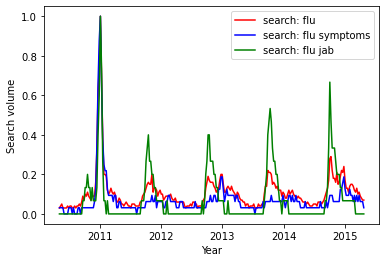

In [448]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(flu_df.date, flu_df.flu_norm, 'r', label="search: flu")
ax.plot(flu_df.date, flu_df.flu_symptoms_norm, 'b',label="search: flu symptoms")
ax.plot(flu_df.date, flu_df.flu_jab_norm, 'g',label="search: flu jab")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Search volume")

<AxesSubplot:xlabel='date'>

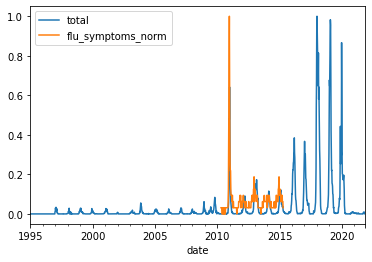

In [449]:
data_path = os.path.join("data", "who_flunet_uk.csv")
#print(data_path)

# if "whodata.csv" is in the same directory use
# who_df = pd.read_csv("whodata.csv")


#who_df.columns.to_list()

colnames = [ 'a_h5_label', 'year', 'week', 'a_h5',
          'a_h1_label', 'a_h1',
          'a_h1n1_label', 'a_h1n1',
           'a_h3_label', 'a_h3',
          'a_notsubtyped_label', 'a_notsubtyped',
          'b_yamagata_label', 'b_yamagata',
          'b_victoria_label', 'b_victoria',
          'b_notdetermined_label', 'b_notdetermined' ]

who_df = pd.read_csv(data_path, skiprows=4, names= colnames) 

date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)

who_df['date']=date_vals   

#who_df = who_df[( who_df.year >= 2010) & (who_df.year <= 2015 )]


col_selection = [ 'date', 'a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped',
                  'b_yamagata','b_victoria','b_notdetermined' ]

who_df = who_df[col_selection]

a_cols = ['a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped']
b_cols = ['b_yamagata','b_victoria','b_notdetermined']

who_df['total_a'] = who_df[a_cols].sum(axis=1)
who_df['total_b'] = who_df[b_cols].sum(axis=1)
who_df['total'] = who_df['total_a'] + who_df['total_b']

who_df['total'] = who_df['total']/who_df['total'].max()

ax = who_df.plot(x='date', y='total')
flu_df.plot(x='date', y='flu_symptoms_norm', ax=ax)

In [450]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu.csv")
#print(data_path)

flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu'])

flu_df.date = pd.to_datetime(flu_df.date)

data_cols = flu_df.columns[flu_df.columns != 'date']

flu_df[data_cols] = flu_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_df[col] = flu_df[col]/flu_df[col].max()
    
flu_df

,date,flu
0,2010-05-02,0.06
1,2010-05-09,0.06
2,2010-05-16,0.07
3,2010-05-23,0.06
4,2010-05-30,0.05
...,...,...
256,2015-03-29,0.11
257,2015-04-05,0.09
258,2015-04-12,0.08
259,2015-04-19,0.08


In [451]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu_jab.csv")
#print(data_path)

flu_jab_df = None
flu_jab_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu_jab'])

flu_jab_df.date = pd.to_datetime(flu_jab_df.date)

data_cols = flu_jab_df.columns[flu_jab_df.columns != 'date']

flu_jab_df[data_cols] = flu_jab_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_jab_df[col] = flu_jab_df[col]/flu_jab_df[col].max()
    
flu_df['flu_jab'] = flu_jab_df['flu_jab']
flu_df

,date,flu,flu_jab
0,2010-05-02,0.06,0.00
1,2010-05-09,0.06,0.01
2,2010-05-16,0.07,0.00
3,2010-05-23,0.06,0.01
4,2010-05-30,0.05,0.00
...,...,...,...
256,2015-03-29,0.11,0.01
257,2015-04-05,0.09,0.00
258,2015-04-12,0.08,0.01
259,2015-04-19,0.08,0.01


<AxesSubplot:xlabel='date'>

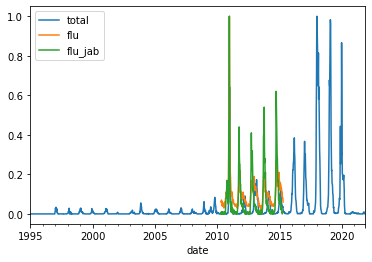

In [452]:
ax = who_df.plot(x='date', y='total')
flu_df.plot(x='date', y=['flu','flu_jab'], ax=ax)

In [453]:
start_date = flu_df.iloc[0].date
end_date = flu_df.iloc[-1].date

date_index = pd.date_range(start=start_date, end=end_date, freq='w')
flu_df.index = date_index


row_selection = (who_df['date'] >= start_date) & (who_df['date'] <= end_date)
who_df = who_df[row_selection]

who_df.index = date_index[:-1]

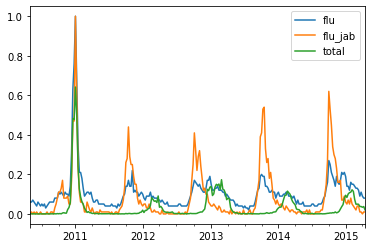

In [454]:
combined_df = pd.concat([flu_df.iloc[:-1], who_df['total']], axis=1 )
data_cols = combined_df.columns[combined_df.columns != 'date']
ax = combined_df[data_cols].plot()

In [455]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='total ~ flu + flu_jab ', data=combined_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     790.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          1.54e-110
Time:                        11:35:08   Log-Likelihood:                 559.87
No. Observations:                 260   AIC:                            -1114.
Df Residuals:                     257   BIC:                            -1103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0421      0.003    -16.131      0.000      -0.047      -0.037
flu            0.9988      0.028     35.820      0.000       0.944       1.054
flu_jab       -0.3510      0.021    -16.838      0.000      -0.392      -0.310
==============================================================================
Omnibus:                       16.086   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.185
Skew:                           0.148   Prob(JB):                     6.91e-10
Kurtosis:                       4.951   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
f"predicted_total = {lm.params['flu']:.3f}*flu + {lm.params['flu_jab']:.3f}*flu_jab"



'predicted_total = 0.999*flu + -0.351*flu_jab'

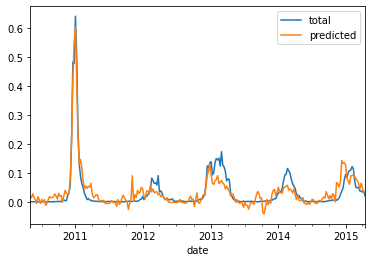

In [457]:
combined_df['predicted'] = lm.fittedvalues

ax = combined_df.plot(x='date', y=['total','predicted'])